In [1]:
# Import libraries
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Latex, Math, Image
import sys
from Vehicle import UnitConversion, steerFunc, steerPlot

# Unit conversion
mm_pr_in, m_pr_in, N_pr_lb, lb_pr_N, ms_pr_kmh, ms_pr_mph, Nm_pr_ftlbs = UnitConversion()

# Simulation

In [2]:
# Initial velocity in x
v_x0 = 0.5

# Initial position
x0 = 0
y0 = 0

# Initial yaw angle
gamma0 = 0

# Initial values
Yzero=[v_x0,0,0,gamma0,x0,y0]

# Time interval
t_span = np.arange(0, 15, 0.0001)
t_interval = (0, 15)

# Friction constant
mu = 1

# Steering angle
def delta_f(t):
    if  t >= 0.1 and t <= 1.3:
        return -np.deg2rad(4)
    else:
        return 0

# velocity
def vel_d(t):
    return 1.0

# yaw
def yaw_d(t):
    return np.deg2rad(2)

# Vacuum normal force at suspension, friction force from vacuum sheet
N_s = 770
F = 180

The simulation is run:

In [3]:
t_span, delta_f_arr, v_x, v_y, V, gamma, dgamma, beta, X, Y, X_t, Y_t, F_ty, F_y, N, skid, F_skid, X_le, Y_le, X_te, Y_te, le_attach, te_attach = steerFunc(delta_f, vel_d, yaw_d, N_s, F, t_interval, t_span, tire_model='nonlinear', winch=True, mu=mu, Yzero=Yzero)

# Plots

## Trajectory

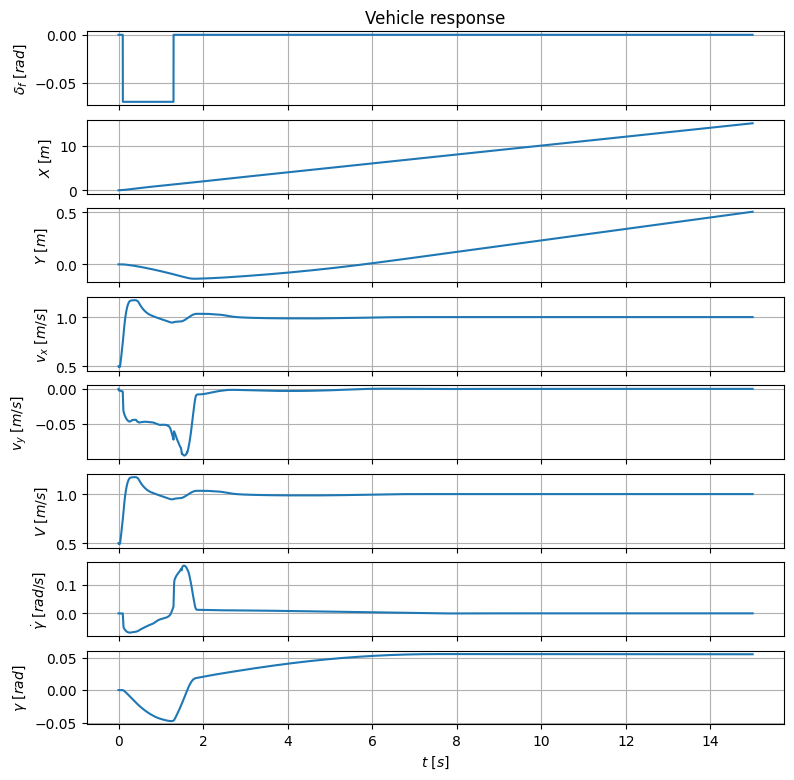

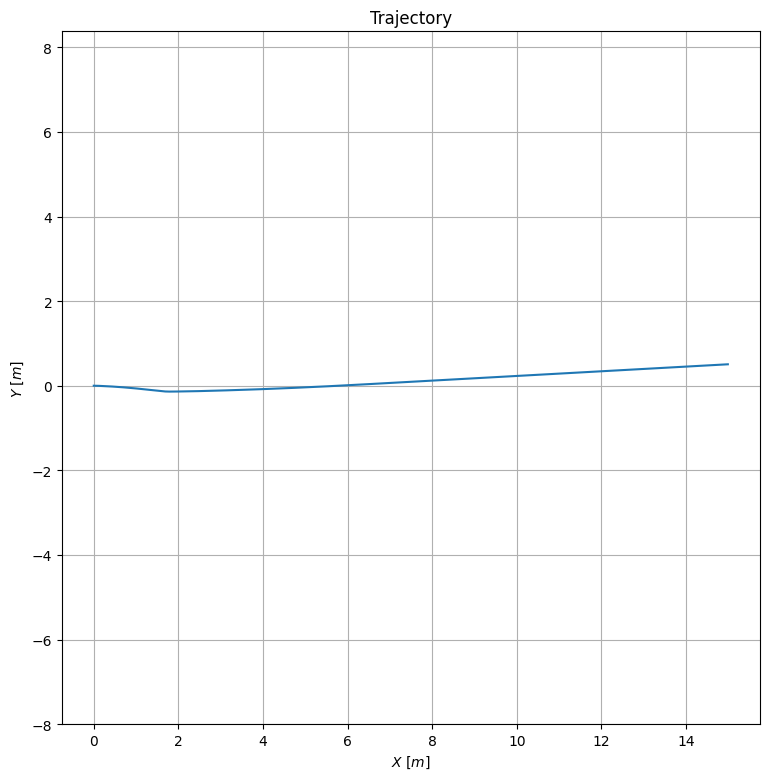

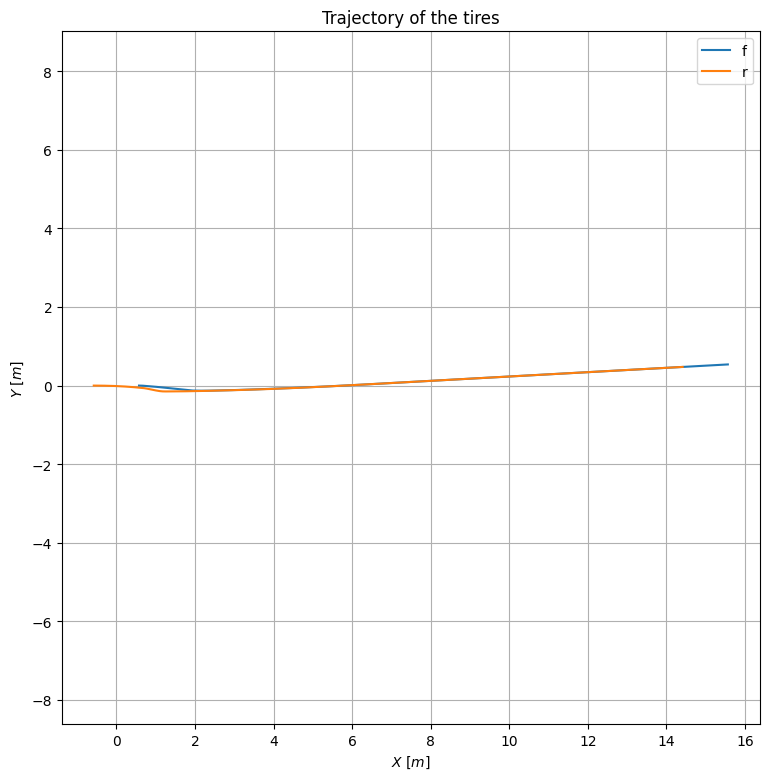

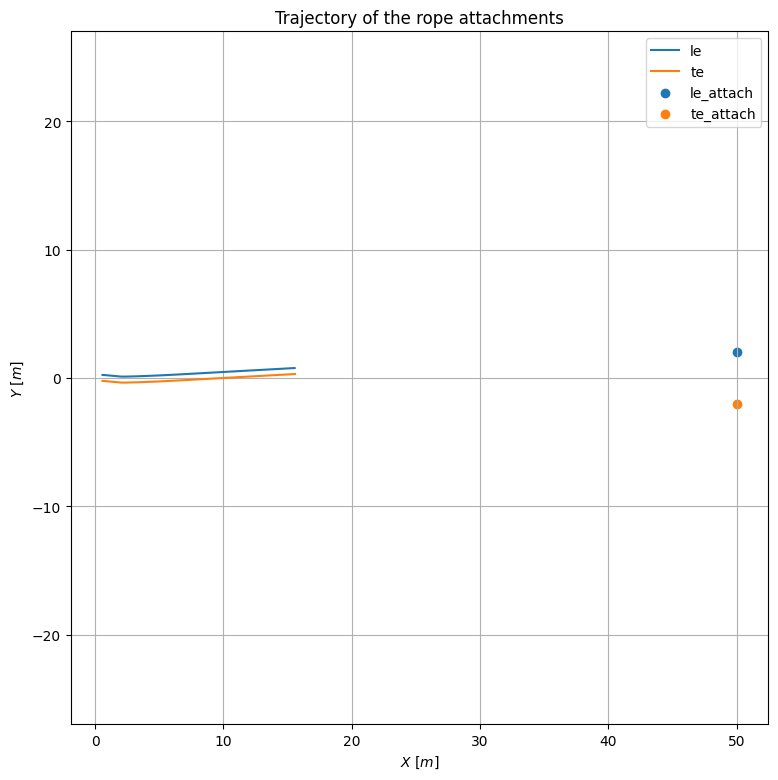

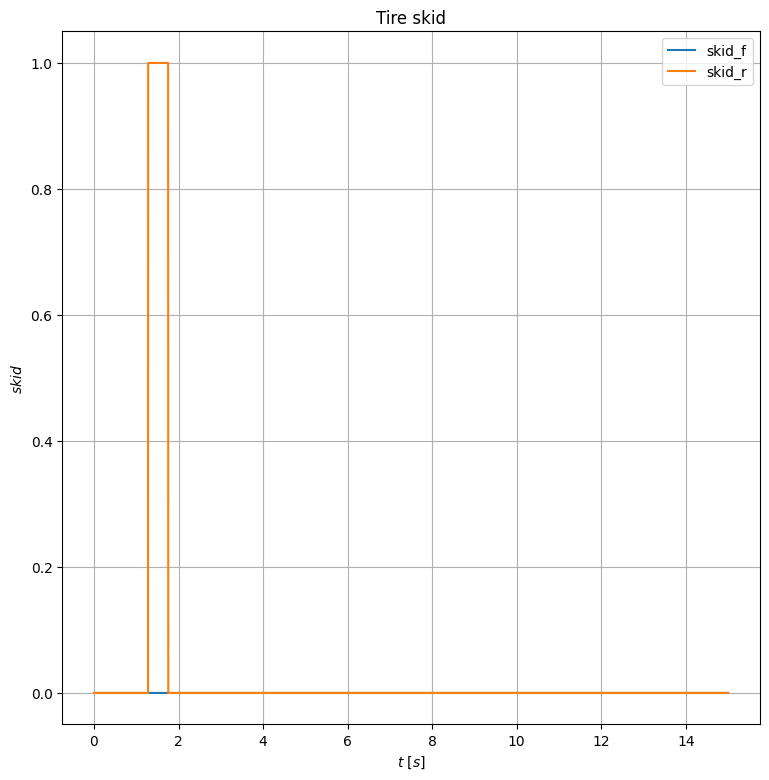

In [4]:
steerPlot(t_span=t_span, delta_f=delta_f_arr, v_x=v_x, v_y=v_y, V=V, gamma=gamma, dgamma=dgamma, X=X, Y=Y, X_t=X_t, Y_t=Y_t, skid=skid, X_le=X_le, Y_le=Y_le, X_te=X_te, Y_te=Y_te, le_attach=le_attach, te_attach=te_attach)